In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv('train.csv', usecols = ['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['Age'].isnull().sum()

177

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

In [6]:
X_train , X_test , y_train , y_test = train_test_split(df.drop(columns = "Survived"),df["Survived"],test_size = 0.2 , random_state = 42)

In [7]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


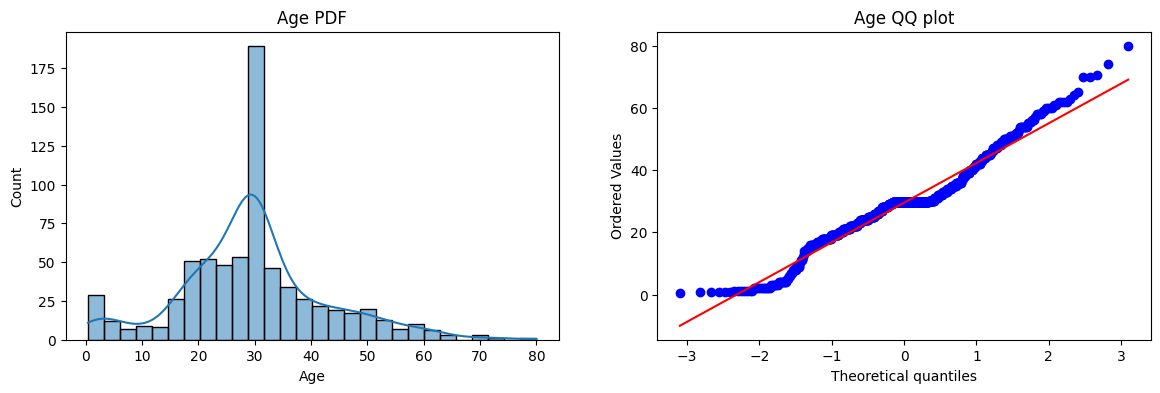

In [8]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(X_train['Age'] , kde = True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist = "norm" , plot =plt)
plt.title('Age QQ plot')

plt.show()

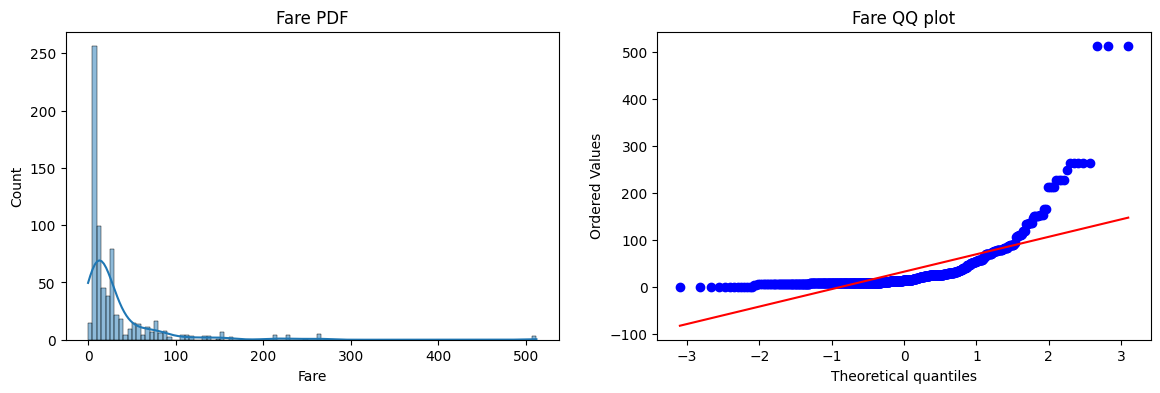

In [9]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'] , kde = True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist = "norm" , plot =plt)
plt.title('Fare QQ plot')

plt.show()

In [10]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [11]:
clf.fit(X_train, y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred_lr = clf.predict(X_test)
y_pred_dtc = clf2.predict(X_test)

In [13]:
print("LR ",accuracy_score(y_test , y_pred_lr))
print("DT ",accuracy_score(y_test , y_pred_dtc))

LR  0.6480446927374302
DT  0.664804469273743


In [14]:
trf = FunctionTransformer( func = np.log1p)
# add 1 log1p

In [15]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed,y_train)

y_pred_lr = clf.predict(X_test_transformed)
y_pred_dtc = clf2.predict(X_test_transformed)

print("LR ",accuracy_score(y_test , y_pred_lr))
print("DT ",accuracy_score(y_test , y_pred_dtc))


LR  0.6815642458100558
DT  0.6871508379888268


In [17]:
X_transformed = trf.fit_transform(df.drop(columns = "Survived"))

In [18]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR" , np.mean(cross_val_score(clf,X_transformed, df["Survived"] , scoring = 'accuracy' , cv = 10)))
print("DT" , np.mean(cross_val_score(clf,X_transformed, df["Survived"] , scoring = 'accuracy' , cv = 10)))
      


LR 0.678027465667915
DT 0.678027465667915


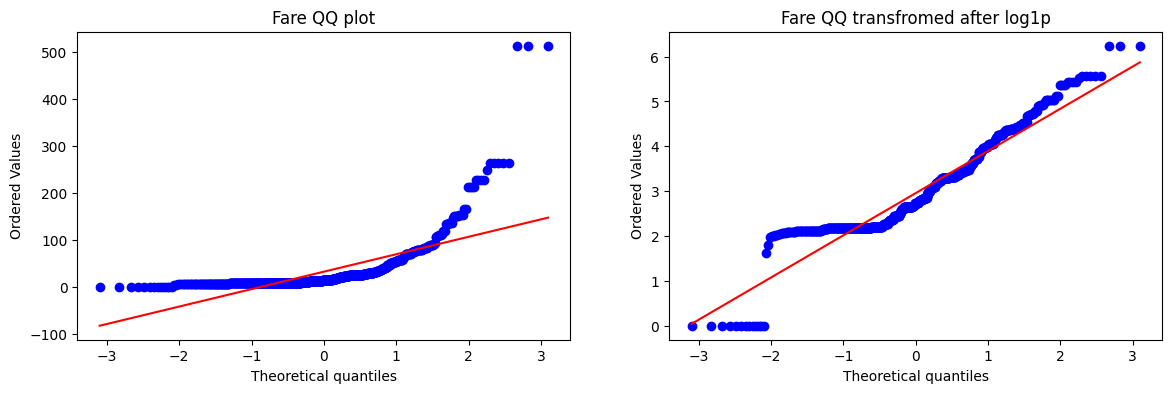

In [19]:
plt.figure(figsize = (14,4))
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist = "norm" , plot = plt)
plt.title('Fare QQ transfromed after log1p')

plt.subplot(121)
stats.probplot(X_train['Fare'], dist = "norm" , plot =plt)
plt.title('Fare QQ plot')

plt.show()

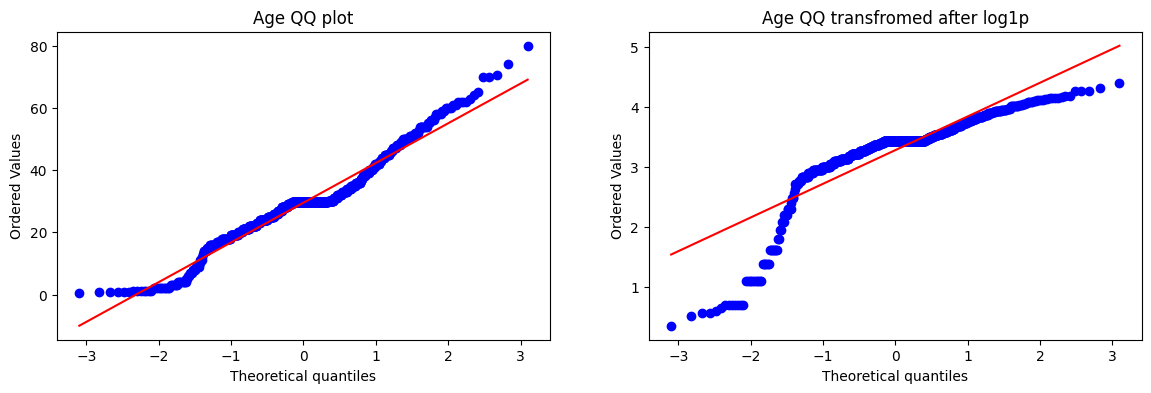

In [20]:
plt.figure(figsize = (14,4))
plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist = "norm" , plot = plt)
plt.title('Age QQ transfromed after log1p')

plt.subplot(121)
stats.probplot(X_train['Age'], dist = "norm" , plot =plt)
plt.title('Age QQ plot')

plt.show()

In [21]:
# applying transformer  to fare 
trf2 = ColumnTransformer([('log' , FunctionTransformer(np.log1p) , ['Fare'])], remainder = 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)


In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred_lr = clf.predict(X_test_transformed2)
y_pred_dtc = clf2.predict(X_test_transformed2)

print("LR ",accuracy_score(y_test , y_pred_lr))
print("DT ",accuracy_score(y_test , y_pred_dtc))


LR  0.6703910614525139
DT  0.6871508379888268


In [23]:
X_transformed2 = trf.fit_transform(df.drop(columns = "Survived"))
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR" , np.mean(cross_val_score(clf,X_transformed2, df["Survived"] , scoring = 'accuracy' , cv = 10)))
print("DT" , np.mean(cross_val_score(clf,X_transformed2, df["Survived"] , scoring = 'accuracy' , cv = 10)))
      


LR 0.678027465667915
DT 0.678027465667915


In [24]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
   # print(X)
    trf = ColumnTransformer([('log', FunctionTransformer(transform) , ['Fare'])] , remainder = 'passthrough')
    X_trans = trf.fit_transform(df.drop(columns = "Survived"))
   # print(X_trans[:,0])

    clf = LogisticRegression()

    print("Accuracy", np.mean(cross_val_score(clf,X_trans, y, scoring = 'accuracy' , cv = 10)))

    plt.figure(figsize = (14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist = "norm" , plot = plt)
    plt.title('Fare Before Transfrom')

    plt.subplot(122)
    stats.probplot(X_trans[:,0] , dist = "norm" , plot = plt)
    plt.title('Fare after Transfrom')

    plt.show()
    

    

Accuracy 0.61729088639201


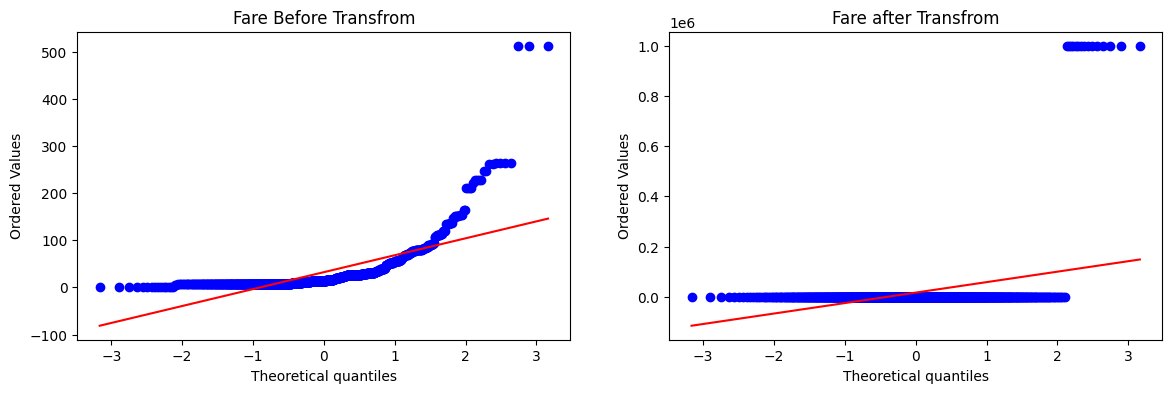

In [25]:
apply_transform(lambda x:1/(x+0.000001))

## Box Cox Transform

In [26]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression


In [27]:
df = pd.read_csv('concrete_data.csv')

In [28]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [29]:
df.shape

(1030, 9)

In [30]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [31]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [32]:
X_train , X_test , y_train , y_test = train_test_split(df.drop(columns = "Strength"),df["Strength"],test_size = 0.2 , random_state = 42)

In [33]:
# applying regression

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.6275531792314848

In [34]:
# cross check with cross val score

lr = LinearRegression()
np.mean(cross_val_score(lr,df.drop(columns = "Strength"),df["Strength"],scoring = "r2"))

0.46099404916628683

In [35]:
# applying box cox transform

pt = PowerTransformer( method='box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed = pt.transform(X_test + 0.000001)

pd.DataFrame({'cols':X_train.columns , 'box_cox_lamda': pt.lambdas_})

,cols,box_cox_lamda
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


In [36]:
X_train_transformed.shape

(824, 8)

In [37]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred = lr.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.8047825006181187

In [38]:
#cross val score
pt = PowerTransformer(method = 'box-cox')
X_transformed = pt.fit_transform( df.drop(columns = 'Strength') + 0.00001)
lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed , df['Strength'] , scoring= 'r2'))

0.6668489653763874

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[i])


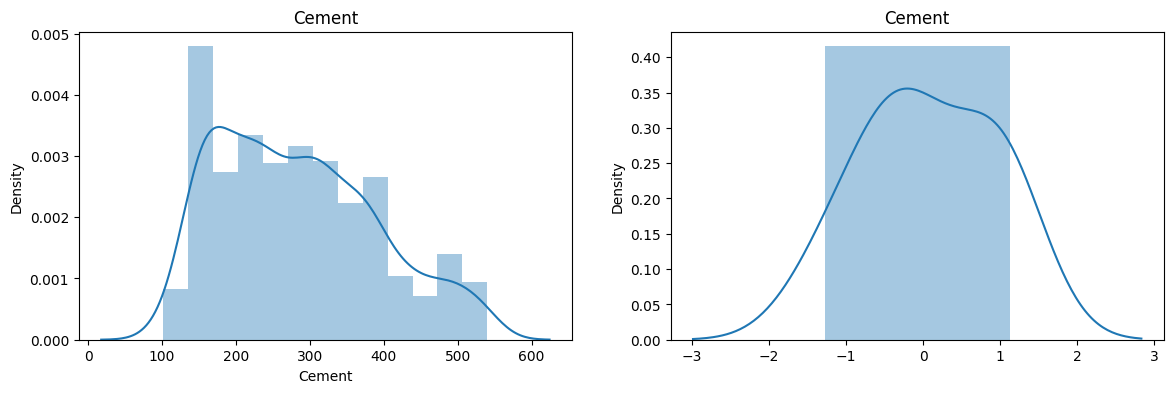

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[i])


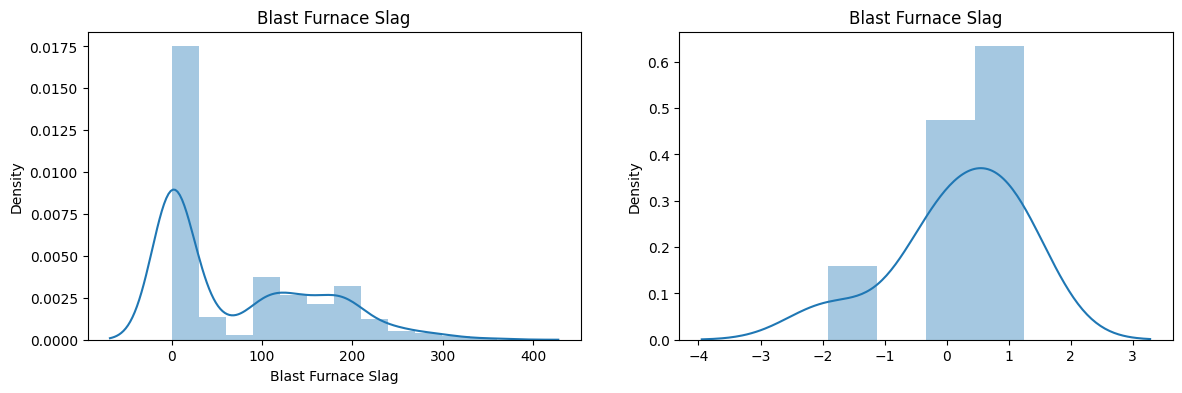

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[i])


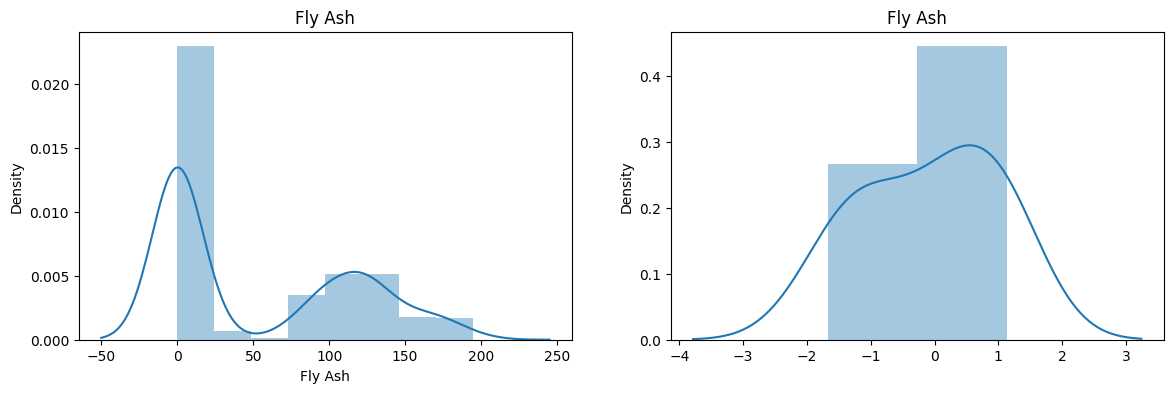

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[i])


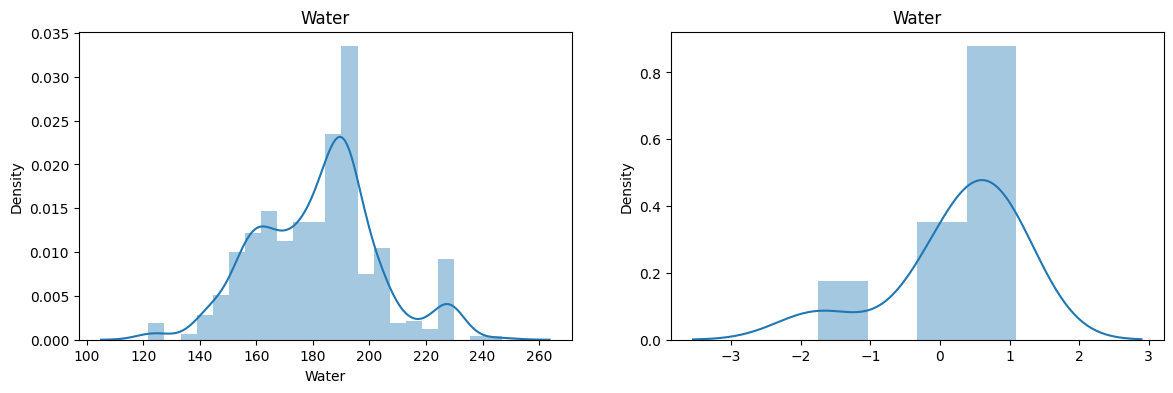

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[i])


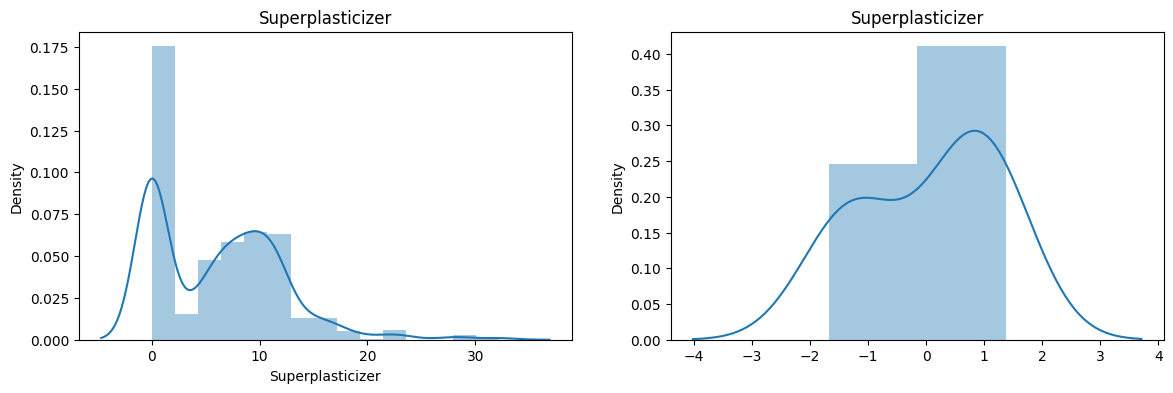

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[i])


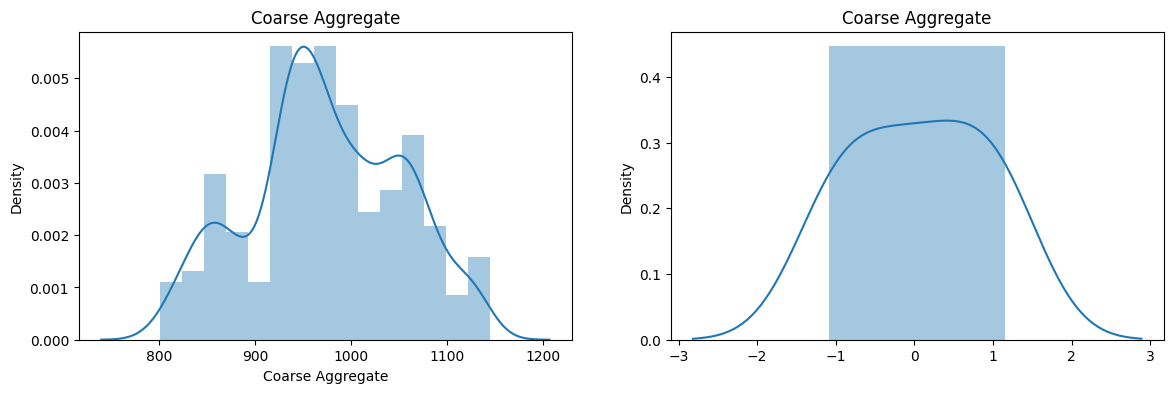

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[i])


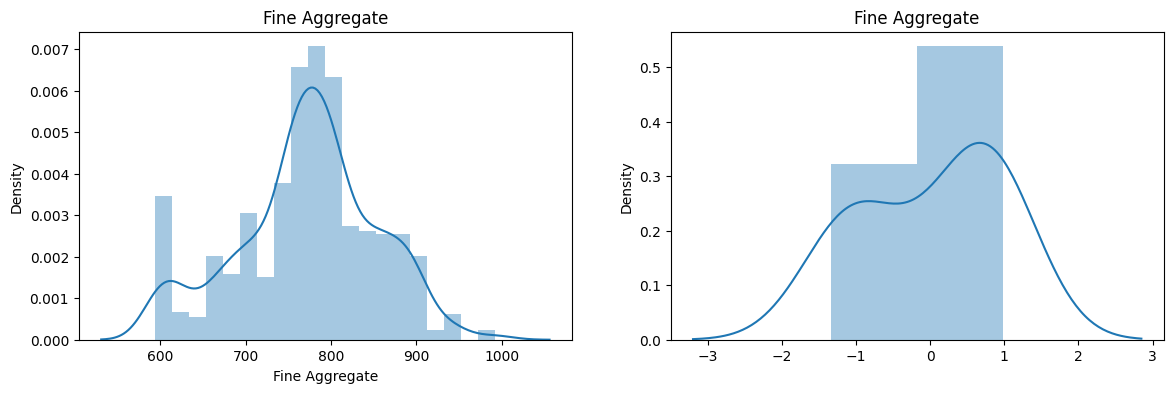

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\2286393593.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[i])


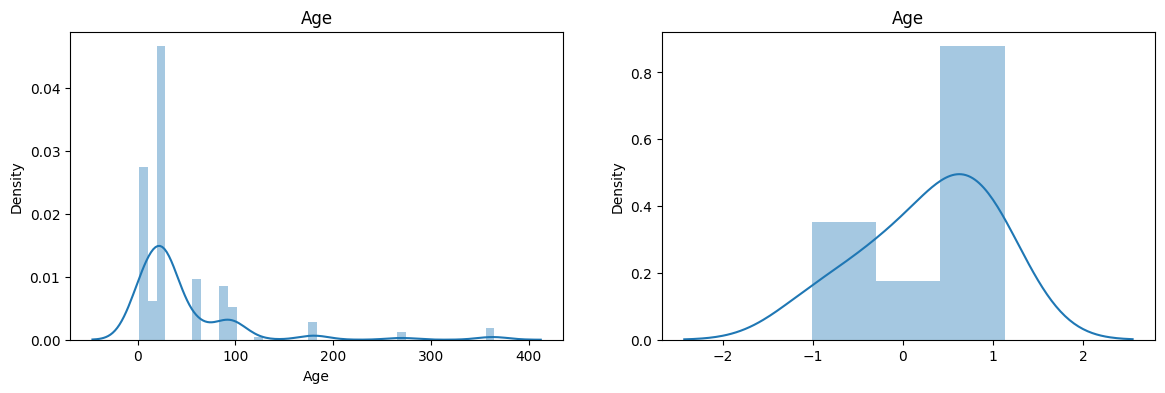

In [39]:
# before and after comparison for box-cox plot
i=0;
for col in X_train.columns:
    plt.figure(figsize= (14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[i])
    i+=1
    plt.title(col)

    plt.show()

In [40]:
#cross val score  , use yeo-jhonson
pt1 = PowerTransformer()
X_transformed = pt1.fit_transform( df.drop(columns = 'Strength'))
lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed , df['Strength'] , scoring= 'r2'))

0.6834625134285742

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i])


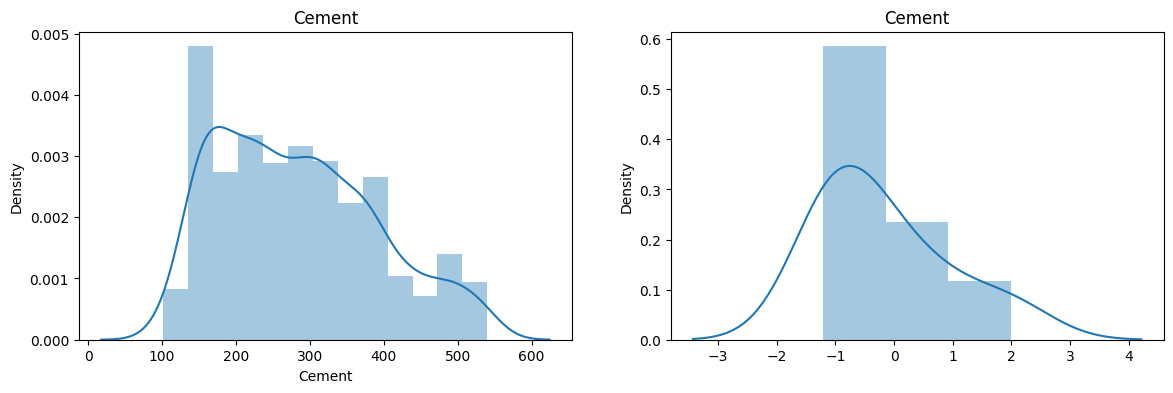

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i])


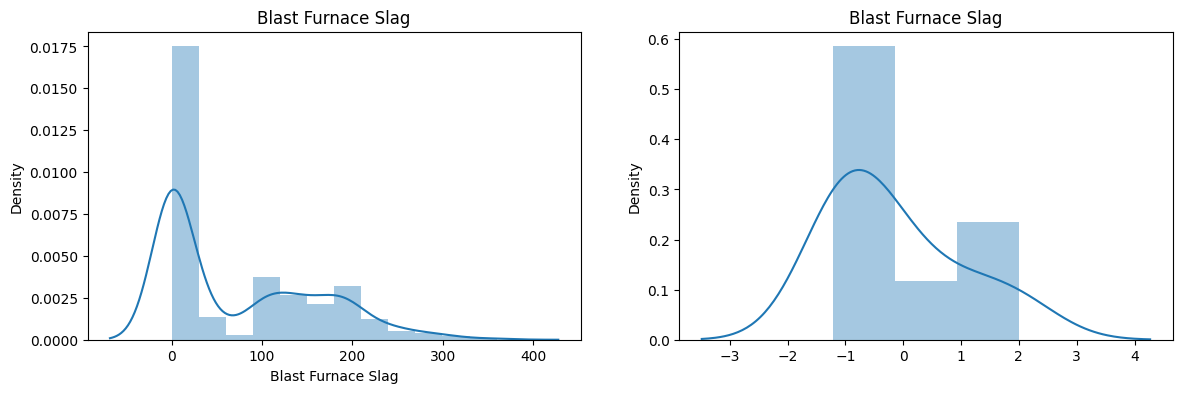

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i])


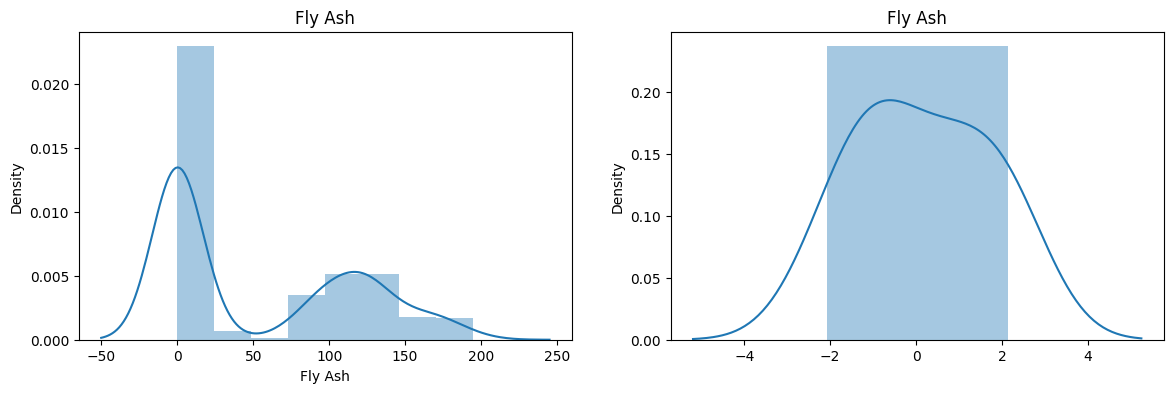

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i])


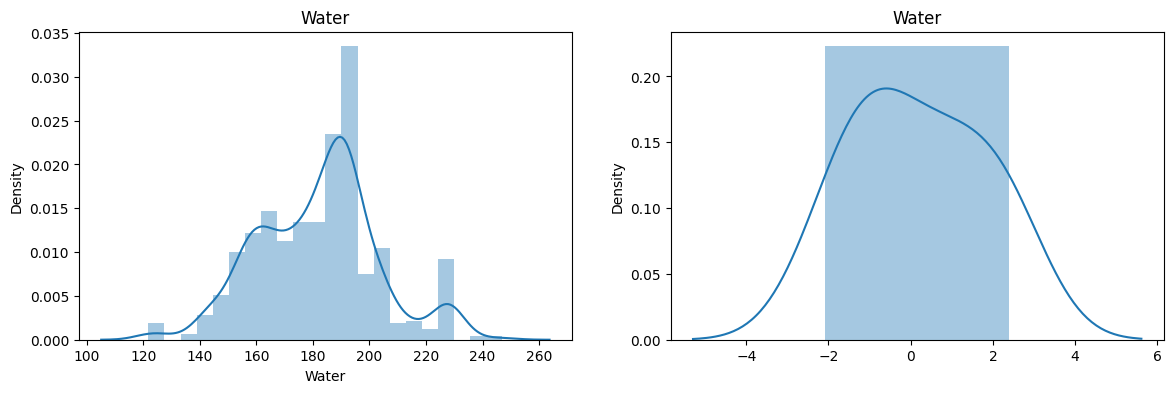

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i])


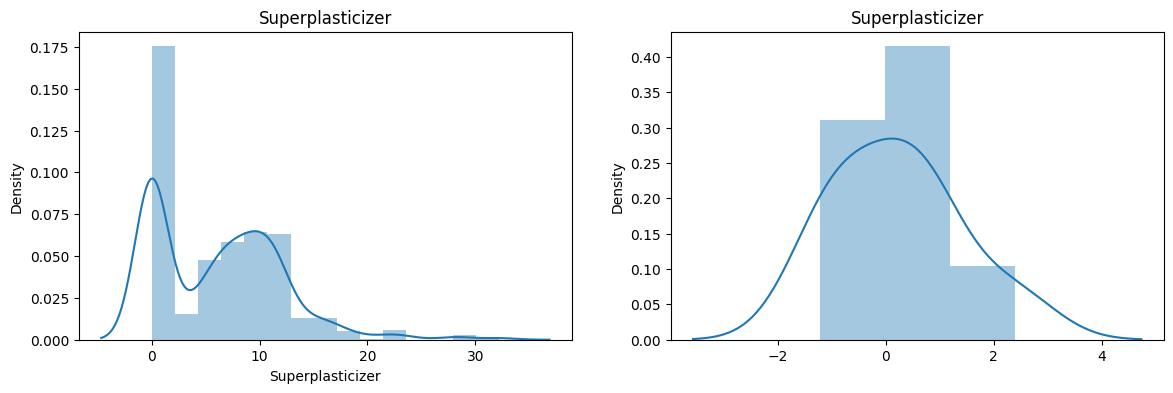

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i])


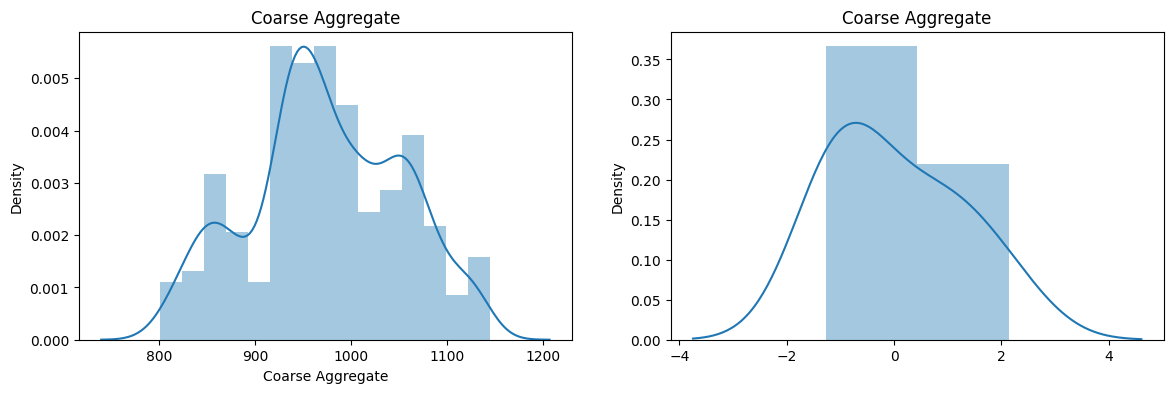

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i])


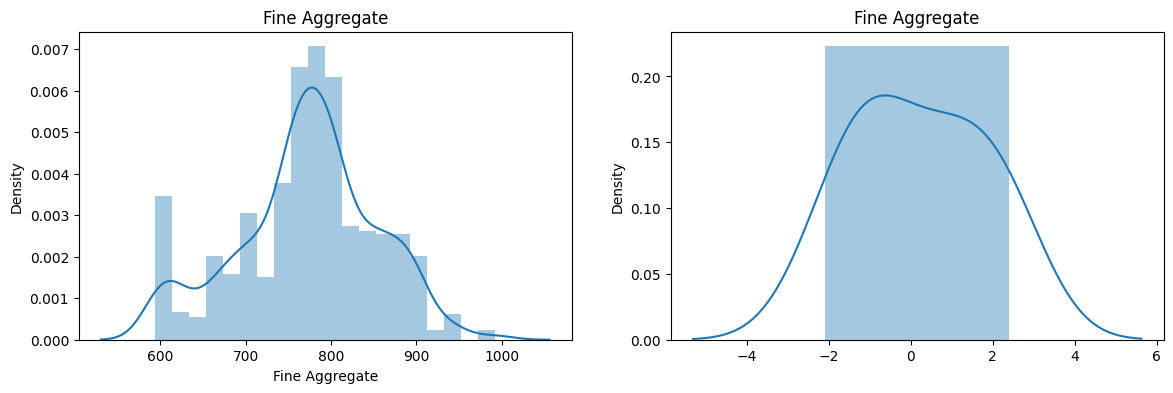

C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\DELL\AppData\Local\Temp\ipykernel_15292\654030788.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[i])


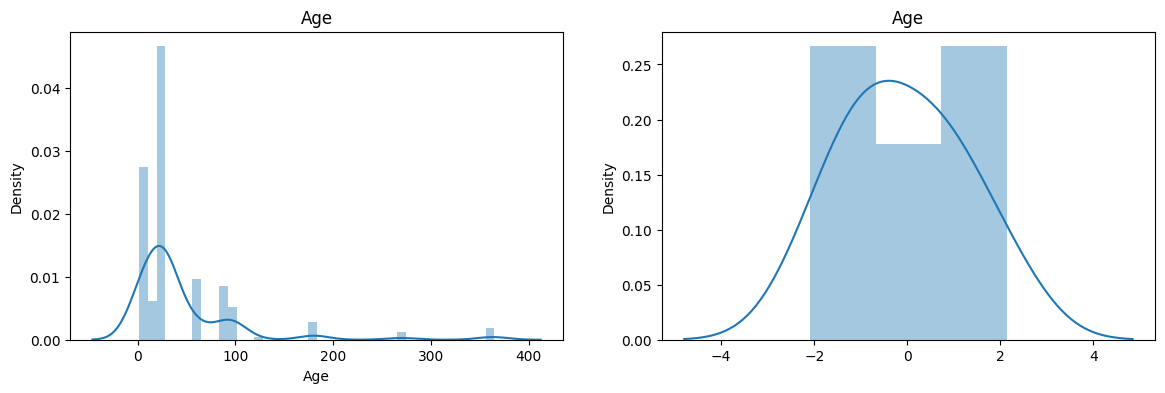

In [41]:
# before and after comparison for box-cox plot
i=0;
for col in X_train.columns:
    plt.figure(figsize= (14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_transformed[i])
    i+=1
    plt.title(col)

    plt.show()

In [42]:
# side by side lambas

pd.DataFrame({'cols':X_train.columns , 'box_cox_lambdas':pt.lambdas_ , 'yeo_jhonson_lambas': pt1.lambdas_})

,cols,box_cox_lambdas,yeo_jhonson_lambas
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.028052,0.016633
2,Fly Ash,-0.037072,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.114979,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830763
7,Age,0.048975,0.001771
